# Import libraries and functions 

In [101]:
import numpy as np
import scipy, matplotlib
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

names = ["age","workclass","fnlwgt","education",
          "education-num","marital-status","occupation",
          "relationship","race","sex","capital-gain","capital-loss",
          "hous-per-week","native-country","income"]

top_7_features =[]


# Do the data preprocessing before training the models
def preprocessingData(data):
    
    # remove the data with null values
    # data = data.replace("?",np.nan)
    data.dropna(inplace = True)

    
# encoding out dataset which can be categoried
    cat_mask = data.dtypes==object
    cat_cols = data.columns[cat_mask].tolist()
    non_cat_mask = data.dtypes!=object
    non_cat_cols = data.columns[non_cat_mask].tolist()
    le = LabelEncoder()
    data[cat_cols] = data[cat_cols].apply(lambda col: le.fit_transform(col))
    data_encoded = data[cat_cols]

    
# Standarization of data
    sc = StandardScaler()
    data[non_cat_cols] = sc.fit_transform(data[non_cat_cols])
    # print(data_train[non_cat_cols])
    data_std=data[non_cat_cols] 

    
# split the data values and target values 
    x = data.iloc[: , :-1].values
    y= data.iloc[: , 14:].values.ravel()
    return x,y, cat_mask,data_encoded, data_std


# get the info about the model prediction 
def predictInfo(classifier, name):
    
    print("-----" + name + "------")
    
    y_train_pred = classifier.predict(df_x)
    print('Mismatched training data:', (df_y != y_train_pred).sum())

    y_test_pred = classifier.predict(df_x_v)
    print('Mismatched test data:', (df_y_v != y_test_pred).sum())
    
    # Normalized score accuracy 
    print('Accuracy score: %.5f' % accuracy_score(df_y_v, y_test_pred))
    plotROC(classifier)
    if name == "Random Forest":
        featureImportance(classifier)

# To plot the ROC graph
def plotROC (classifier):
    probs = classifier.predict_proba(df_x_v)
    probs = probs[:, 1]
    auc = roc_auc_score(df_y_v, probs)
    print('AUC: %.2f' % auc)
    fpr, tpr, thresholds = roc_curve(df_y_v, probs)
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# To plot the feature importance
def featureImportance(classifier):
    importances = classifier.feature_importances_
    std = np.std([tree.feature_importances_ for tree in classifier.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    xName =[]
    for i in indices.tolist():
        xName.append(names[i])
        if len(top_7_features) < 7 :
            top_7_features.append(i)
    # Plot the feature importances 
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(df_x.shape[1]), importances[indices],
           color="b", yerr=std[indices], align="center")
    plt.xticks(range(df_x.shape[1]), xName,rotation=90)
    plt.xlim([-1, df_x.shape[1]])
    plt.show()

print ("Library and functions laoded")

Library and functions laoded


# Import the data

In [102]:
## IMport
# import the data
data_train = pd.read_csv("dataset/adult.data",header=None, names =names,sep=",\s",na_values=["?"],engine='python') 
data_test = pd.read_csv("dataset/adult.test",header=None, names =names,sep=",\s",na_values=["?"],engine='python') 

print("Data imported")

Data imported


# Format of raw data

In [103]:
# display the original format of the data
data_train.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hous-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Preprocessing

In [104]:
# preprocess the data and get back the formatted training and testing data set
df_x, df_y,cat_mask_train,data_encoded_train, data_std_train = preprocessingData(data_train)
df_x_v, df_y_v,cat_mask_test,data_encoded_test, data_std_test = preprocessingData(data_test)
print("Data preprocessed")

Data preprocessed


## 1. Data filtering

In [105]:
sample_2.head(5).tail(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hous-per-week,native-country,income
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [106]:
sample_1 = pd.read_csv("dataset/adult.data",header=None, names =names,sep=",\s",na_values=["?"],engine='python') 
sample_2 = pd.read_csv("dataset/adult.test",header=None, names =names,sep=",\s",na_values=["?"],engine='python') 

print("Training Data:")
print("Original data: " + str(sample_1.shape) )
print("Dropping NaN:  " + str(df_x.shape) )
print("\n")
print("Testing Data:")
print("Original data: " + str(sample_2.shape) )
print("Dropping NaN:  " + str(df_x_v.shape) )

Training Data:
Original data: (32561, 15)
Dropping NaN:  (30162, 14)


Testing Data:
Original data: (16281, 15)
Dropping NaN:  (15060, 14)


## 2.  Encoding

In [107]:
print(cat_mask_train)

age               False
workclass          True
fnlwgt            False
education          True
education-num     False
marital-status     True
occupation         True
relationship       True
race               True
sex                True
capital-gain      False
capital-loss      False
hous-per-week     False
native-country     True
income             True
dtype: bool


In [108]:
data_encoded_train.head(10)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,5,9,4,0,1,4,1,38,0
1,4,9,2,3,0,4,1,38,0
2,2,11,0,5,1,4,1,38,0
3,2,1,2,5,0,2,1,38,0
4,2,9,2,9,5,2,0,4,0
5,2,12,2,3,5,4,0,38,0
6,2,6,3,7,1,2,0,22,0
7,4,11,2,3,0,4,1,38,1
8,2,12,4,9,1,4,0,38,1
9,2,9,2,3,0,4,1,38,1


## 3. Standarization

In [109]:
data_std_train.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hous-per-week
0,0.042796,-1.062722,1.128918,0.146092,-0.218586,-0.077734
1,0.880288,-1.007871,1.128918,-0.147445,-0.218586,-2.331531
2,-0.033340,0.244693,-0.439738,-0.147445,-0.218586,-0.077734
3,1.108695,0.425240,-1.224066,-0.147445,-0.218586,-0.077734
4,-0.794697,1.406658,1.128918,-0.147445,-0.218586,-0.077734
5,-0.109476,0.897180,1.521083,-0.147445,-0.218586,-0.077734
6,0.804152,-0.280232,-2.008395,-0.147445,-0.218586,-2.081109
7,1.032559,0.187865,-0.439738,-0.147445,-0.218586,0.339636
8,-0.566290,-1.363097,1.521083,1.754199,-0.218586,0.757005
9,0.271203,-0.287217,1.128918,0.551697,-0.218586,-0.077734


# Logistic Regression & Decision Tree

-----Logistic Regression------
Mismatched training data: 5417
Mismatched test data: 2715
Accuracy score: 0.81972
AUC: 0.85


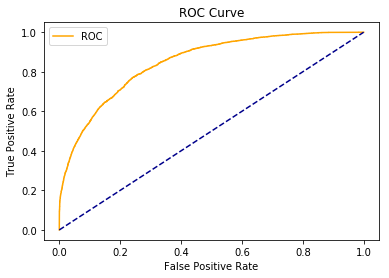

-----Decision Tree------
Mismatched training data: 1
Mismatched test data: 3001
Accuracy score: 0.80073
AUC: 0.74


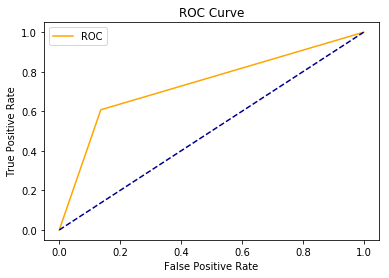

In [110]:
# run it in Logistic Regression
lr = LogisticRegression(max_iter=100, tol=1e-3, C=1, solver='liblinear', multi_class='ovr')
lr = lr.fit(df_x, df_y)
predictInfo(lr,"Logistic Regression")


# run it in Decision Tree
dt = DecisionTreeClassifier()
dt = dt.fit(df_x,df_y)
predictInfo(dt,"Decision Tree")

# K-th neighbors vote

-----K-3 neighbors vote------
Mismatched training data: 3163
Mismatched test data: 2788
Accuracy score: 0.81487
AUC: 0.82


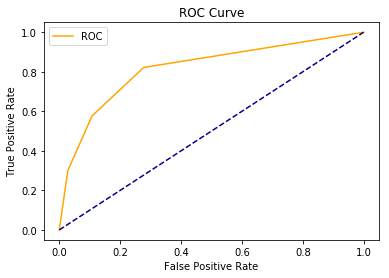

-----K-5 neighbors vote------
Mismatched training data: 3731
Mismatched test data: 2678
Accuracy score: 0.82218
AUC: 0.84


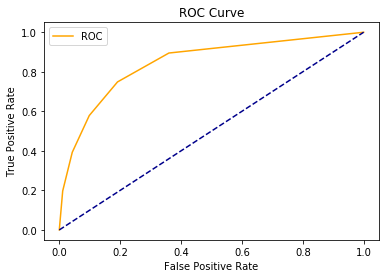

-----K-7 neighbors vote------
Mismatched training data: 4036
Mismatched test data: 2642
Accuracy score: 0.82457
AUC: 0.86


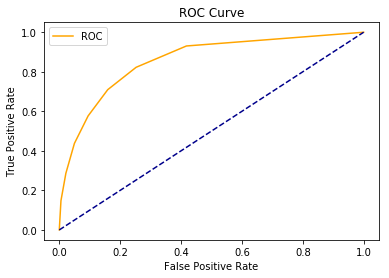

In [111]:
# run it in K-nearest neighbors vote
from sklearn.neighbors import KNeighborsClassifier
kneigh_3 = KNeighborsClassifier(n_neighbors=3)
kneigh_3 = kneigh_3.fit(df_x,df_y)
predictInfo(kneigh_3,"K-3 neighbors vote")

kneigh_5 = KNeighborsClassifier(n_neighbors=5)
kneigh_5 = kneigh_5.fit(df_x,df_y)
predictInfo(kneigh_5,"K-5 neighbors vote")

kneigh_7 = KNeighborsClassifier(n_neighbors=7)
kneigh_7 = kneigh_7.fit(df_x,df_y)
predictInfo(kneigh_7,"K-7 neighbors vote")

# Random forest

-----Random Forest------
Mismatched training data: 2
Mismatched test data: 2302
Accuracy score: 0.84714
AUC: 0.90


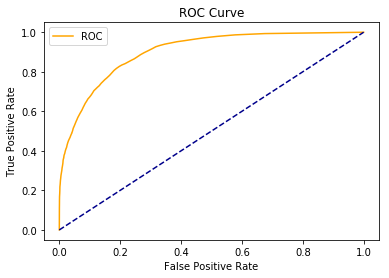

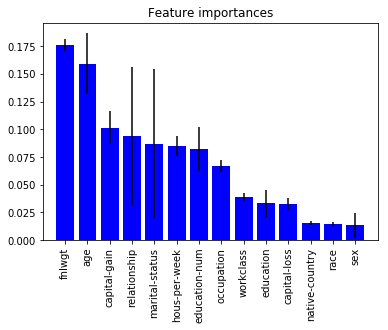

In [112]:
# run it in Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=85, random_state=1)
forest= forest.fit(df_x,df_y)

predictInfo(forest,"Random Forest")
# Extract 7 top feat ures from random forest and test the models
df_x = df_x[:, top_7_features]
df_x_v = df_x_v[:, top_7_features]

# SVM

-----SVM------
Mismatched training data: 4784
Mismatched test data: 2423
Accuracy score: 0.83911
AUC: 0.89


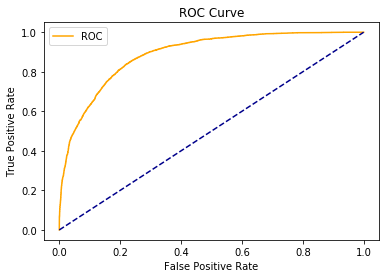

In [113]:
# implement SVM
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=1, C=1.0, gamma=0.025,probability=True)
svm = svm.fit(df_x, df_y)
predictInfo(svm,"SVM")

# Logistic Regression again and Decision Tree with important features

-----Logistic Regression------
Mismatched training data: 5595
Mismatched test data: 2824
Accuracy score: 0.81248
AUC: 0.84


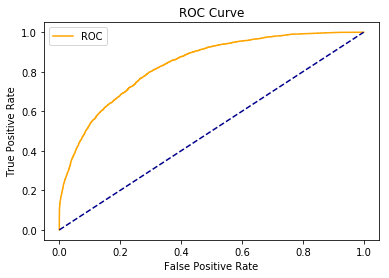

-----Decision Tree------
Mismatched training data: 23
Mismatched test data: 3163
Accuracy score: 0.78997
AUC: 0.72


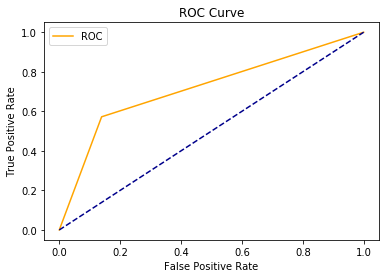

-----Random Forest-Top7------
Mismatched training data: 30
Mismatched test data: 2592
Accuracy score: 0.82789
AUC: 0.87


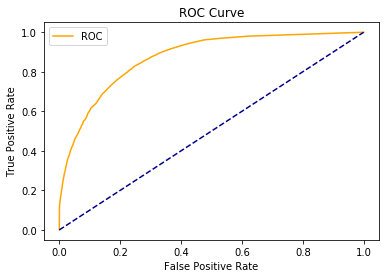

In [114]:
# Logistic Regression
lr = LogisticRegression(max_iter=100, tol=1e-3, C=1, solver='liblinear', multi_class='ovr')
lr = lr.fit(df_x, df_y)
predictInfo(lr,"Logistic Regression")

# Decision Tree
dt = DecisionTreeClassifier()
dt = dt.fit(df_x,df_y)
predictInfo(dt,"Decision Tree")

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=85, random_state=1)
forest= forest.fit(df_x,df_y)

predictInfo(forest,"Random Forest-Top7")

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 10,random_state = 0)
lda = lda.fit_transform(data_encoded_train)
plt.scatter(data_encoded_train[:,0],data_encoded_train[:,1],marker='o',c=y)
plt.show()
# predictInfo(lda,"LDA")